# Tai Duc Nguyen - ECES 641 - Homework 1

## Table of content:

1. [Problem 1.a](#Problem-1.a)
2. [Problem 1.b&c](#Problem-1.b&c)
3. [Problem 1.d](#Problem-1.d)
4. [Problem 2 and 3](#Problem-2-&-3)
5. [Problem 4.a](#Problem-4.a)
6. [Problem 4.b](#Problem-4.b)
7. [Problem 4.c](#Problem-4.c)

In [1]:
import itertools
import random
from tqdm.auto import tqdm
from Bio import SeqIO
from Bio.SeqUtils import GC

In [2]:
with open("AF1226.fasta", "r") as handle:
    records = list(SeqIO.parse(handle, "fasta"))
    aa_seq = records[0].seq.__str__()

## Problem 1.a

In [3]:
print("\n## Problem 1 part a ##\n")
aa_sub_seq = aa_seq[140:147]
print(aa_sub_seq)


## Problem 1 part a ##

HARVARD


In [4]:
std_map = {
    'A': ['GCT','GCC','GCA','GCG'],
    'R': ['CGT','CGC','CGA','CGG','AGA','AGG'],
    'N': ['AAT','AAC'],
    'D': ['GAT','GAC'],
    'C': ['TGT','TGC'],
    'Q': ['CAA','CAG'],
    'E': ['GAA','GAG'],
    'G': ['GGT','GGC'  'GGA'  'GGG'],
    'H': ['CAT','CAC'],
    'I': ['ATT','ATC','ATA'],
    'L': ['TTA','TTG','CTT','CTC','CTA','CTG'],
    'K': ['AAA','AAG'],
    'M': ['ATG'],
    'F': ['TTT','TTC'],
    'P': ['CCT','CCC','CCA','CCG'],
    'S': ['TCT','TCC','TCA','TCG','AGT','AGC'],
    'T': ['ACT','ACC','ACA','ACG'],
    'W': ['TGG'],
    'Y': ['TAT','TAC'],
    'V': ['GTT','GTC','GTA','GTG'],
    'Stops': ['TAA','TAG','TGA'],
    'Starts': ['TTG','CTG','ATG'],
}

In [5]:
def aa_to_nuc(aa_seq):
    aa_to_nuc_list = []
    for aa in aa_seq:
        aa_to_nuc_list.append(std_map[aa])

    nuc_seqs = list(itertools.product(*aa_to_nuc_list))
    nuc_seqs = [''.join(list(seq)) for seq in nuc_seqs]
    return nuc_seqs

## Problem 1.b&c

In [6]:
nuc_seqs = aa_to_nuc(aa_sub_seq)
print("\n## Problem 1 part b & c ##\n")
print(f"{len(nuc_seqs)} nucleotide seqs can give rise to {aa_sub_seq}.")
print("Printing the first 50 seqs:")
print('\n'.join(nuc_seqs[:50]))


## Problem 1 part b & c ##

9216 nucleotide seqs can give rise to HARVARD.
Printing the first 50 seqs:
CATGCTCGTGTTGCTCGTGAT
CATGCTCGTGTTGCTCGTGAC
CATGCTCGTGTTGCTCGCGAT
CATGCTCGTGTTGCTCGCGAC
CATGCTCGTGTTGCTCGAGAT
CATGCTCGTGTTGCTCGAGAC
CATGCTCGTGTTGCTCGGGAT
CATGCTCGTGTTGCTCGGGAC
CATGCTCGTGTTGCTAGAGAT
CATGCTCGTGTTGCTAGAGAC
CATGCTCGTGTTGCTAGGGAT
CATGCTCGTGTTGCTAGGGAC
CATGCTCGTGTTGCCCGTGAT
CATGCTCGTGTTGCCCGTGAC
CATGCTCGTGTTGCCCGCGAT
CATGCTCGTGTTGCCCGCGAC
CATGCTCGTGTTGCCCGAGAT
CATGCTCGTGTTGCCCGAGAC
CATGCTCGTGTTGCCCGGGAT
CATGCTCGTGTTGCCCGGGAC
CATGCTCGTGTTGCCAGAGAT
CATGCTCGTGTTGCCAGAGAC
CATGCTCGTGTTGCCAGGGAT
CATGCTCGTGTTGCCAGGGAC
CATGCTCGTGTTGCACGTGAT
CATGCTCGTGTTGCACGTGAC
CATGCTCGTGTTGCACGCGAT
CATGCTCGTGTTGCACGCGAC
CATGCTCGTGTTGCACGAGAT
CATGCTCGTGTTGCACGAGAC
CATGCTCGTGTTGCACGGGAT
CATGCTCGTGTTGCACGGGAC
CATGCTCGTGTTGCAAGAGAT
CATGCTCGTGTTGCAAGAGAC
CATGCTCGTGTTGCAAGGGAT
CATGCTCGTGTTGCAAGGGAC
CATGCTCGTGTTGCGCGTGAT
CATGCTCGTGTTGCGCGTGAC
CATGCTCGTGTTGCGCGCGAT
CATGCTCGTGTTGCGCGCGAC
CATGCTCGTGTTGCGC

In [7]:
def nt2aa_cgbiased(aa_seq):
    nuc_seqs = aa_to_nuc(aa_seq)
    cg_cont = [GC(seq) for seq in nuc_seqs]
    sorted_cg_cont = sorted(list(zip(nuc_seqs, cg_cont)), key=lambda x: x[1], reverse=True)
    highest_cg = [s for s in sorted_cg_cont if s[1] == sorted_cg_cont[0][1]]
    return highest_cg

## Problem 1.d

In [8]:
highest_cg = nt2aa_cgbiased(aa_sub_seq)
print("\n## Problem 1 part d ##\n")
print(f"The highest cg content is: {highest_cg[0][1]}. One of the sequence with this cg content is:\n{random.choice(highest_cg)[0]}")


## Problem 1 part d ##

The highest cg content is: 85.71428571428571. One of the sequence with this cg content is:
CACGCCCGGGTCGCCCGCGAC


## Problem 4.a

In [9]:
print("\n## Problem 4 part a ##\n")

print('''In MATLAB R2020b, I tried to:
1. Import 2 sequences:
seq1 = fastaread('/home/bigboy/2-coursework/641eces/hw/src/NC_002695.fasta');
seq2 = fastaread('/home/bigboy/2-coursework/641eces/hw/src/NC_002655.fasta');
2. Run global sequence alignment with:
[score, alignment] = nwalign(seq1, seq2)

However, MATLAB returns an error saying:
`Requested 5528446x5498579 (28310.9GB) array exceeds maximum array size preference. Creation of arrays greater than this limit may take a long time and cause MATLAB to become unresponsive.`

This is true because the two sequences are ~5.5 million nucleotides long. Creating a score matrix of ~5.5 mil by ~5.5 mil is very expensive.

Using BLAST, the result of the 2 sequences is:

Max Score: 9.921e+05 bits(537267)
Expect: 0.0
Query Cover: 99%
Identities: 537547/537763(99%)
Gaps: 22/537763(0%)

These two sequences are very similar and closely related.
''')


## Problem 4 part a ##

In MATLAB R2020b, I tried to:
1. Import 2 sequences:
seq1 = fastaread('/home/bigboy/2-coursework/641eces/hw/src/NC_002695.fasta');
seq2 = fastaread('/home/bigboy/2-coursework/641eces/hw/src/NC_002655.fasta');
2. Run global sequence alignment with:
[score, alignment] = nwalign(seq1, seq2)

However, MATLAB returns an error saying:
`Requested 5528446x5498579 (28310.9GB) array exceeds maximum array size preference. Creation of arrays greater than this limit may take a long time and cause MATLAB to become unresponsive.`

This is true because the two sequences are ~5.5 million nucleotides long. Creating a score matrix of ~5.5 mil by ~5.5 mil is very expensive.

Using BLAST, the result of the 2 sequences is:

Max Score: 9.921e+05 bits(537267)
Expect: 0.0
Query Cover: 99%
Identities: 537547/537763(99%)
Gaps: 22/537763(0%)

These two sequences are very similar and closely related.



In [10]:
import matplotlib.pyplot as plt
from math import ceil

from Bio import GenBank
from Bio import Align

In [11]:
with open("gene1.gb") as handle1, open("gene2.gb") as handle2:
    rec1 = list(GenBank.parse(handle1))
    rec2 = list(GenBank.parse(handle2))


In [12]:
def get_aa_translation(rec):
    for feature in rec.features:
        if 'CDS' in feature.key:
            for qual in feature.qualifiers:
                if 'translation' in qual.key:
                    return qual.value.strip('"')

In [13]:
gene1 = (rec1[0].sequence, get_aa_translation(rec1[0]))
gene2 = (rec2[0].sequence, get_aa_translation(rec2[0]))

In [14]:
aligner = Align.PairwiseAligner()
aligner.mode = 'global'
aligner.match_score = 1
aligner.mismatch_score = -1

In [15]:
def get_aligned_seqs_and_plot_hist(alignment, bin_width=20):
    max_alignment_score = max(len(alignment.target), len(alignment.query))*aligner.match_score
    print(f"Alignment score: {alignment.score} out of max={max_alignment_score} ({alignment.score/max_alignment_score*100:.2f}%)")

    aligned_str = f"{alignment}"
    t = aligned_str.index('|') - 1
    gene1_nuc_aligned = aligned_str[0:t]
    gene2_nuc_aligned = aligned_str[t*2+2:-1]

    assert(len(gene1_nuc_aligned) == len(gene2_nuc_aligned))

    print(aligned_str)

    dissim = []
    for i in range(len(gene1_nuc_aligned)):
        if gene1_nuc_aligned[i] != gene2_nuc_aligned[i]:
            # print(f"pos {i}, s1[i]={gene1_nuc_aligned[i]}, s2[i]={gene2_nuc_aligned[i]}")
            dissim.append(i)

    plt.figure(figsize=(10,7))
    n, bins, _ = plt.hist(dissim, ceil(len(gene1_nuc_aligned)/bin_width))
    plt.xlabel('Aligned Sequence index position')
    plt.ylabel('Number of dissimilarities')
    plt.grid(True)
    plt.show()

    return n, bins

## Problem 4.b


## Problem 4 part b ##

Alignment score: 1303.0 out of max=1377.0 (94.63%)
ATGTTACCTTCTCAATCCCCTGCAATTTTTACCGTTAGCCGCCTGAATCAAACAG-TTCGTCTGCTGCTTGAGCATGAGATGGGGCAGGTGTGGATCAGCGGCGAAATCTCTAATTTTACACAACCAGCCTCCGGTCACTGGTACTTTACGCTTAAAGACGATACCGCGCAGGTGCGCTGTGCGATGTTCCG-AAACAGCAACCGCCGGGTCACCTTCCGCCCACAGCACGGGCAACAGGTTTTAGTTCGCGCCAATATTACG-CTCTACGAGCCGCGCGGT-GACT-A-CCAGA-TTATCGTCGAAAGTATGCAGCCTG-CCGGTGAAGGG-TTGCTGCAACA-AAAA-TACGAACAGCTTAAAGCGAAA-TTGCAGGCTGAAGGTCT-GTTCGAT-CA-GCAATACAAAAAAA-CACTTCCC-TCCCCTGCGCATTGCGTC-GGTGTGATCACCTCAAAAACCGGTGCTGCGCTACATGATATTTTGCATGTGTTAAAACGTCGCGATCCTTCTCTGCCGGTGATCATCTAC-CCCACCGCCGTT-CAGGGCG-ATGAC-GCGCCGGGGCAAATT-GTTCGC-GCCATTGAG-CTGGCGAATCA-GCG-AAACGAGTGC-GACGTGTT-AATCGTC-GGGCGCG-G-CGGC-GGTTCGCTGGAAGATTTG-TGGAGTTTTAAC-GAC-GAACGCGTAG---CGCGGGCGATTTTTGCCAGCCTC--ATTCCGG-TAGT-AAGT-GCCGTCGGGCATGAAACCGATGTGACGA-TTGCC-GA-TTTTGTTGCTGAT-TTG-CGTGCGCCAACGCCGTCT-GCCGCCGCTGAAGTAG-TGAGCCGC-AATCAA-CAGGAG--TTA-CTG-CGTCAGGTGCAG-TCTG-CGCA-G-CAG-CG-CCTCG-A-AATGGC-AATGGA-

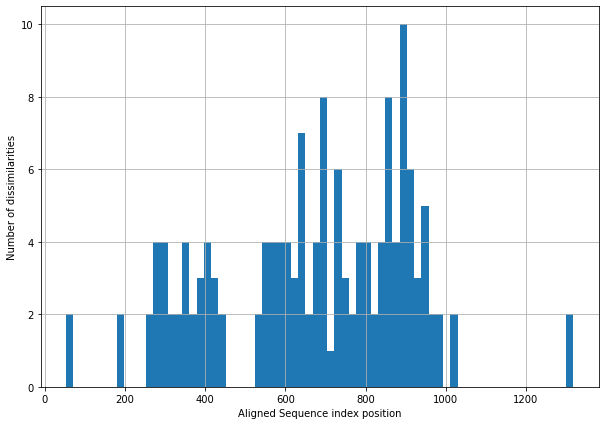

In [16]:
print("\n## Problem 4 part b ##\n")
alignments = aligner.align(gene1[0], gene2[0])
n, bins = get_aligned_seqs_and_plot_hist(alignments[0], bin_width=21)

In [17]:
sorted_bins = sorted(list(zip(n, bins[0:-1], bins[1:])), key=lambda x: x[0], reverse=True)
print("Showing the top ten region of dense dissimilarity (number of dissimilars, start idx pos, end idx pos):")
for b in sorted_bins[:10]:
    print(b)

Showing the top ten region of dense dissimilarity (number of dissimilars, start idx pos, end idx pos):
(10.0, 884.9428571428572, 903.0285714285715)
(8.0, 686.0, 704.0857142857143)
(8.0, 848.7714285714286, 866.8571428571429)
(7.0, 631.7428571428571, 649.8285714285714)
(6.0, 722.1714285714286, 740.2571428571429)
(6.0, 903.0285714285715, 921.1142857142856)
(5.0, 939.1999999999999, 957.2857142857142)
(4.0, 270.0285714285714, 288.1142857142857)
(4.0, 288.1142857142857, 306.2)
(4.0, 342.37142857142857, 360.45714285714286)


## Problem 4.c


## Problem 4 part c ##

Alignment score: 448.0 out of max=458.0 (97.82%)
MLPSQSPAIFTVSRLNQTVRLLLEHEMGQVWISGEISNFTQPASGHWYFTLKDDTAQVRCAMFRNSNRRVTFRPQHGQQVLVRANITLYEPRGDYQIIVESMQPAGEGLLQQKYEQLKAKLQAEGLFD--QQYKKT-LPSPAHCVGVITSKTGAALHDILHVLKRRDPSLPVIIYP-TAVQGDDAPGQIVRAIELANQ-RNECDVLIVGRGGGSLEDLWSFNDERVARAIFASL-IP-VVSAVGHETDVTIADFVADLRAPTPSAAAEVVSRNQQELLRQVQSA--QQRLEMAMDYYLANRTRRFTQIHHRLQQQHPQLRLARQQTMLERLQKRMSFALENQLKRAGQQQQRLTRQLVQQNPQSRIHRAQTRIQQLEYRLAETLRAQLSATRERFGNAVTHLEAVSPLSTLARGYSVTSAADGA-LLKQVKQVKVGETLTTRLGDGVVISEVSAVTKTRKSRKKTSNP
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||---|-|||--||||||||||||||||||||||||||||||||||||||--||||||||||||||||||||--||||||||||||||||||||||||||||||||||--||-|-|||||||||||||||||||||||||||||||||||||||||||---|-||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||-|-||||||||||||||||||||||||||||||

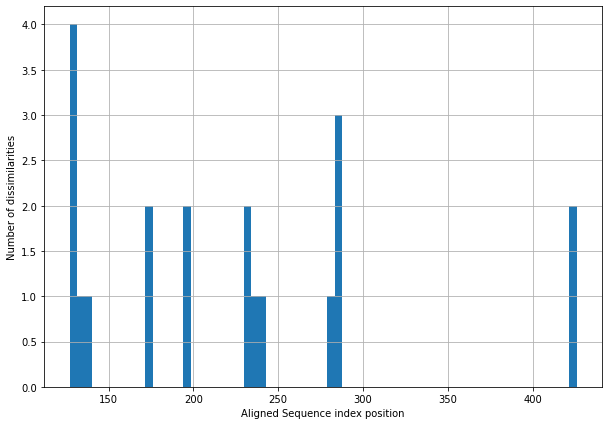

In [18]:
print("\n## Problem 4 part c ##\n")
alignments = aligner.align(gene1[1], gene2[1])
n, bins = get_aligned_seqs_and_plot_hist(alignments[0], bin_width=7)

In [19]:
sorted_bins = sorted(list(zip(n, bins[0:-1], bins[1:])), key=lambda x: x[0], reverse=True)
print("Showing the top ten region of dense dissimilarity (number of dissimilars, start idx pos, end idx pos):")
for b in sorted_bins[:10]:
    print(b)

Showing the top ten region of dense dissimilarity (number of dissimilars, start idx pos, end idx pos):
(4.0, 127.0, 131.46268656716418)
(3.0, 283.1940298507463, 287.65671641791045)
(2.0, 171.62686567164178, 176.08955223880596)
(2.0, 193.94029850746267, 198.40298507462688)
(2.0, 229.64179104477614, 234.1044776119403)
(2.0, 421.53731343283584, 426.0)
(1.0, 131.46268656716418, 135.92537313432837)
(1.0, 135.92537313432837, 140.38805970149252)
(1.0, 234.1044776119403, 238.56716417910448)
(1.0, 238.56716417910448, 243.02985074626866)


In [20]:
print('''We can see that:
1. The nucleotide sequence score is lower than the amino acid sequence score.
2. The regions of dense dissimilarity do not quite align between the nucleotide alignment and the amino acid alignment.
3. These nucleotide regions of dissimilarity yield a LOW difference in the amino acid sequence.

These 3 observations can be explained by the fact that a single amino acid can be coded with multiple nucleotide sequence. Hence, a slight mutation (a substitution) will cause the nucleotide alignment score to dip, but it may not make any difference in the amino acid sequence.
''')

We can see that:
1. The nucleotide sequence score is lower than the amino acid sequence score.
2. The regions of dense dissimilarity do not quite align between the nucleotide alignment and the amino acid alignment.
3. These nucleotide regions of dissimilarity yield a LOW difference in the amino acid sequence.

These 3 observations can be explained by the fact that a single amino acid can be coded with multiple nucleotide sequence. Hence, a slight mutation (a substitution) will cause the nucleotide alignment score to dip, but it may not make any difference in the amino acid sequence.

